In [71]:
import numpy as np 
import pandas as pd 
import itertools as it

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import roc_curve, auc, roc_auc_score

Getting the Data

In [2]:
test_df = pd.read_csv("./titanic/test.csv")
train_df = pd.read_csv("./titanic/train.csv")

Data Exploration/Analysis

In [3]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

In [6]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [7]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

In [8]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### Data Preprocessing

First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability. I will not drop it from the test set, since it is required there for the submission.

In [9]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [10]:
# extracting and then removing the targets from the training data 
targets = train_df['Survived']
train_df.drop(['Survived'], 1, inplace=True)

In [11]:
train_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [13]:
# merging train data and test data for future feature engineering
# we'll also remove the PassengerID since this is not an informative feature
combined = train_df.append(test_df)
combined.reset_index(inplace=True)
combined.drop(['index', 'PassengerId'], inplace=True, axis=1)

In [14]:
combined

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [15]:
#Now let's map the title can bin them
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Dona": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [16]:
#Generate a new Title column
combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
combined['Title'] = combined['Title'].map(Title_Dictionary)

In [17]:
#let's get the median age based on people's gender, Pclass and Title
fill_mean = lambda g: g.fillna(g.mean())
combined['Age'] = combined.groupby(['Sex', 'Title', 'Pclass'])['Age'].apply(fill_mean)

In [18]:
combined

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,28.31891,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C,Royalty
1306,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,3,"Ware, Mr. Frederick",male,28.31891,0,0,359309,8.0500,NaN,S,Mr


In [19]:
# Name can be dropped now
combined.drop('Name', axis=1, inplace=True)

In [20]:
# removing the title variable
combined.drop('Title', axis=1, inplace=True)

In [21]:
# removing the Cabin variable
combined.drop('Cabin', axis=1, inplace=True)

In [22]:
# removing the Ticket variable
combined.drop('Ticket', axis=1, inplace=True)

In [23]:
#Fill out the missing fare data
combined['Fare'].fillna(combined['Fare'].mean(), inplace=True)

In [24]:
# two missing embarked values - filling them with the most frequent one in the train set
combined['Embarked'].fillna('S', inplace=True)

In [25]:
# encoding in dummy variable
embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
combined = pd.concat([combined, embarked_dummies], axis=1)
combined

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.00000,1,0,7.2500,S,0,0,1
1,1,female,38.00000,1,0,71.2833,C,1,0,0
2,3,female,26.00000,0,0,7.9250,S,0,0,1
3,1,female,35.00000,1,0,53.1000,S,0,0,1
4,3,male,35.00000,0,0,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,male,28.31891,0,0,8.0500,S,0,0,1
1305,1,female,39.00000,0,0,108.9000,C,1,0,0
1306,3,male,38.50000,0,0,7.2500,S,0,0,1
1307,3,male,28.31891,0,0,8.0500,S,0,0,1


In [26]:
combined.drop('Embarked', axis=1, inplace=True)

In [27]:
# mapping gender to numerical one 
combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})

In [28]:
# introducing a new feature : the size of families (including the passenger)
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1

In [29]:
combined

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,3,1,22.00000,1,0,7.2500,0,0,1,2
1,1,0,38.00000,1,0,71.2833,1,0,0,2
2,3,0,26.00000,0,0,7.9250,0,0,1,1
3,1,0,35.00000,1,0,53.1000,0,0,1,2
4,3,1,35.00000,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,1,28.31891,0,0,8.0500,0,0,1,1
1305,1,0,39.00000,0,0,108.9000,1,0,0,1
1306,3,1,38.50000,0,0,7.2500,0,0,1,1
1307,3,1,28.31891,0,0,8.0500,0,0,1,1


### Modelling preparing

In [92]:
#Prepare the training dataset
X = combined.iloc[:891]
y = targets

In [110]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [128]:
param_grid = {"n_estimater": [20, 200],
             "max_feature": ["log2", "sqrt", "auto"],
             "criterion": ["gini", "entropy"],
             "max_depth": [2,5,10], 
             "min_samples_split": [2,5, 8],
             "min_samples_leaf": [1,4,9]
             }

In [129]:
s = sorted(param_grid)
print(s)
combination = it.product(*(param_grid[Name] for Name in s))
ls = list(combination)
print(ls)

['criterion', 'max_depth', 'max_feature', 'min_samples_leaf', 'min_samples_split', 'n_estimater']
[('gini', 2, 'log2', 1, 2, 20), ('gini', 2, 'log2', 1, 2, 200), ('gini', 2, 'log2', 1, 5, 20), ('gini', 2, 'log2', 1, 5, 200), ('gini', 2, 'log2', 1, 8, 20), ('gini', 2, 'log2', 1, 8, 200), ('gini', 2, 'log2', 4, 2, 20), ('gini', 2, 'log2', 4, 2, 200), ('gini', 2, 'log2', 4, 5, 20), ('gini', 2, 'log2', 4, 5, 200), ('gini', 2, 'log2', 4, 8, 20), ('gini', 2, 'log2', 4, 8, 200), ('gini', 2, 'log2', 9, 2, 20), ('gini', 2, 'log2', 9, 2, 200), ('gini', 2, 'log2', 9, 5, 20), ('gini', 2, 'log2', 9, 5, 200), ('gini', 2, 'log2', 9, 8, 20), ('gini', 2, 'log2', 9, 8, 200), ('gini', 2, 'sqrt', 1, 2, 20), ('gini', 2, 'sqrt', 1, 2, 200), ('gini', 2, 'sqrt', 1, 5, 20), ('gini', 2, 'sqrt', 1, 5, 200), ('gini', 2, 'sqrt', 1, 8, 20), ('gini', 2, 'sqrt', 1, 8, 200), ('gini', 2, 'sqrt', 4, 2, 20), ('gini', 2, 'sqrt', 4, 2, 200), ('gini', 2, 'sqrt', 4, 5, 20), ('gini', 2, 'sqrt', 4, 5, 200), ('gini', 2, 'sqrt',

In [130]:
def kfold_index(X_train, k):
    if k < 1:
        print("K cannot be smaller than 1.")
    else:
        l = X_train.shape[0]
        tail = l % k
        q = l // k
        index = [0]
        output_index = []
        
        for i in range(1, tail):
            index.append(i*q + 1)
        for j in range(tail, k+1):
            index.append(j*q + tail)
        for m in range(len(index) - 1):
            output_index.append([index[m], index[m+1]])
        
        return output_index

In [131]:
def cv(model, X_train, y_train, k):
    index = kfold_index(X_train, k)
    
    auc_score = []
    for i in range(k):
        cv_xtest = X_train.iloc[index[i][0]:index[i][1],:]
        cv_ytest = y_train.iloc[index[i][0]:index[i][1],]
        
        cv_xtrain = X_train.drop(X_train.index[index[i][0]:index[i][1]])
        cv_ytrain = y_train.drop(y_train.index[index[i][0]:index[i][1]])
        
        model.fit(cv_xtrain, cv_ytrain.values.reshape(-1))
        
        fpr, tpr, thresholds = metrics.roc_curve(cv_ytest, model.predict_proba(cv_xtest)[:,1])
        auc = metrics.auc(fpr,tpr)
        auc_score.append(auc)
        
    return np.mean(auc_score)

In [98]:
print(ls)

[('gini', 2, 'log2', 1, 2, 20), ('gini', 2, 'log2', 1, 2, 200), ('gini', 2, 'log2', 1, 5, 20), ('gini', 2, 'log2', 1, 5, 200), ('gini', 2, 'log2', 9, 2, 20), ('gini', 2, 'log2', 9, 2, 200), ('gini', 2, 'log2', 9, 5, 20), ('gini', 2, 'log2', 9, 5, 200), ('gini', 5, 'log2', 1, 2, 20), ('gini', 5, 'log2', 1, 2, 200), ('gini', 5, 'log2', 1, 5, 20), ('gini', 5, 'log2', 1, 5, 200), ('gini', 5, 'log2', 9, 2, 20), ('gini', 5, 'log2', 9, 2, 200), ('gini', 5, 'log2', 9, 5, 20), ('gini', 5, 'log2', 9, 5, 200), ('gini', 10, 'log2', 1, 2, 20), ('gini', 10, 'log2', 1, 2, 200), ('gini', 10, 'log2', 1, 5, 20), ('gini', 10, 'log2', 1, 5, 200), ('gini', 10, 'log2', 9, 2, 20), ('gini', 10, 'log2', 9, 2, 200), ('gini', 10, 'log2', 9, 5, 20), ('gini', 10, 'log2', 9, 5, 200)]


In [132]:
rf_clf = RandomForestClassifier(n_estimators=200)
sc = cv(rf_clf, X, y, 5)
print(sc)

0.8577274920044656


In [100]:
y_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
126,3,1,28.318910,0,0,7.7500,0,1,0,1
354,3,1,28.318910,0,0,7.2250,1,0,0,1
590,3,1,35.000000,0,0,7.1250,0,0,1,1
509,3,1,26.000000,0,0,56.4958,0,0,1,1
769,3,1,32.000000,0,0,8.3625,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
732,2,1,32.346715,0,0,0.0000,0,0,1,1
42,3,1,28.318910,0,0,7.8958,1,0,0,1
179,3,1,36.000000,0,0,0.0000,0,0,1,1
123,2,0,32.500000,0,0,13.0000,0,0,1,1


In [133]:
for i in ls:
    rf_clf = RandomForestClassifier(n_estimators=i[5], 
                                    max_features=i[2],
                                    criterion=i[0],
                                    max_depth=i[1],
                                    min_samples_split=i[4],
                                    min_samples_leaf=i[3])
    
    sc = cv(rf_clf, X_train, y_train, 5)
    result = 0
    
    if sc >= result:
        result = sc
        parameter = i
        
print(result, parameter)

0.8626748031704998 ('entropy', 10, 'auto', 9, 8, 200)


In [134]:
best_rf = RandomForestClassifier(n_estimators=parameter[5], 
                                 max_features=parameter[2], 
                                 criterion=parameter[0], 
                                 max_depth=parameter[1], 
                                 min_samples_split=parameter[4], 
                                 min_samples_leaf=parameter[3])
best_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
#roc_curve() returns a list of false positive rates (FPR) and true positives rates (TPR) for different configurations of the classifier used to plot the ROC.
[fpr, tpr, thr] = metrics.roc_curve(y_test, best_rf.predict_proba(X_test)[:,1])

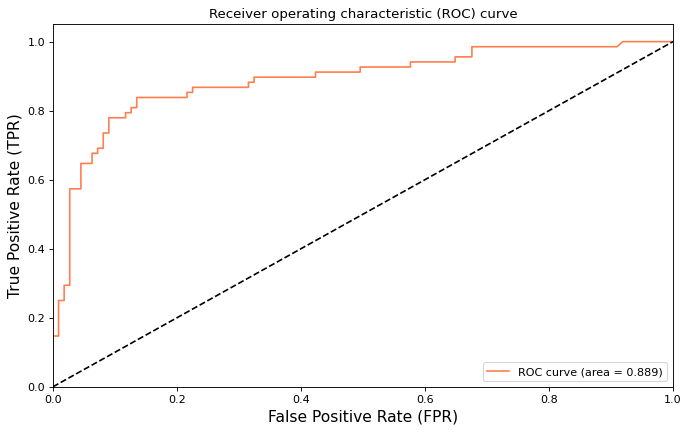

In [136]:
#plot ROC curve
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()